### Description
This assignment is to practice creating a bar graph grid using the tool such as MatPlotLib with Taipei’s traffic accident data from year 101 (2012) to 108 (2019). The files we provide are the data files (xxxTraffic accident.csv) of eight years and a correspondence table for mapping codes to certain fields (Traffic accident chart.csv). In the data file, there are fifteen attributes, including ***Year, Month, Day, Hour, Minute, Processing class, death toll, Injuries Person, Vehicle type, Sex, Age, Weather, Speed limit, Road pattern, Accident location***. With the data files and table, your homework should be done according to the following **requirements**:

#### There are six main topics to be shown in each year:  
   <font color=green> 1. Number of traffic accident death toll per month <br>
   2. Number of traffic accident injuries per month <br>
   3. Number of traffic accident injuries per vehicle type (take the top 10) <br>
   4. Number of traffic accident injuries per weather <br>
   5. Number of traffic accident injuries per road pattern (take the top 10) <br>
   6. Number of traffic accident injuries per accident location (take the top 10) <br>
   </font>
#### Each topic will be presented by a bar chart.   
#### For each year, use bar graph grid to show the six topics. Thus, there will be eight grids for years and each grid has six bar charts for each topic.  

#### On the other hand, please produce the grids for the six topics respectively. Each grid will have eight bar charts for the eight years.  

#### Please do not forget, in each chart, to have the topic on the top and label the x-axis and y-axis.
 


In [1]:
import pandas as pd
import numpy as np 
import collections
import matplotlib.pyplot as plt

In [2]:
data_108 = pd.read_csv("108Traffic_accident.csv")
data_107 = pd.read_csv("107Traffic_accident.csv")
data_106 = pd.read_csv("106Traffic_accident.csv")
data_105 = pd.read_csv("105Traffic_accident.csv")
data_104 = pd.read_csv("104Traffic_accident.csv")
data_103 = pd.read_csv("103Traffic_accident.csv")
data_102 = pd.read_csv("102Traffic_accident.csv")
data_101 = pd.read_csv("101Traffic_accident.csv")
traffic_data_all_years=[data_101,data_102,data_103,data_104,data_105,data_106,data_107,data_108]

In [3]:
month=["1","2","3","4","5","6","7","8","9","10","11","12"]
def death_toll(data,label):
    ysize=3
    xsize=5
    fontsize=12
    fontweight='blod'
    plt.figure(figsize=(xsize, ysize))
    width=0.5
    temp={}

    data_for_month = data.groupby("Month")
    index = np.arange(len(month))               #NumPy arange() is an inbuilt numpy function that returns a ndarray object containing evenly spaced values within the given range. Python np. arange() function returns an evenly spaced values within a given interval
    
    for m in month:
        count=0
        number=len(data_for_month.get_group((int(m))))
        data_for_dt=data_for_month.get_group(int(m)).head(number)
        for death_num in data_for_dt['death_toll']:
            count=count+death_num
        temp[m]=count
    temp=sorted(temp.items(), key=lambda kv: kv[1],reverse = True)
    xdata=[]
    ydata=[]
    for data1 in temp:
        xdata.append(data1[0])
        ydata.append(data1[1])

    plt.bar(index, ydata, width=width, edgecolor='white',label=label)
    plt.xlabel('month',fontsize=fontsize)
    plt.ylabel('death_toll',fontsize=fontsize)
    plt.xticks([r for r in range(len(xdata))], xdata)
    plt.title("death_toll per month")
    plt.show()
   

In [4]:
def Injured_Person(data,label):
    ysize=3
    xsize=5
    fontsize=12
    fontweight='blod'
    width=0.5
    plt.figure(figsize=(xsize, ysize))
    temp={}
    data_for_month = data.groupby("Month")
    index = np.arange(len(month))        #NumPy arange() is an inbuilt numpy function that returns a ndarray object containing evenly spaced values within the given range. Python np. arange() function returns an evenly spaced values within a given interval
    for m in month:
        count=0
        number=len(data_for_month.get_group((int(m))))
        data_for_injured_person=data_for_month.get_group(int(m)).head(number)
        for Injuries_num in data_for_injured_person['Injuries_Person']:
            count=count+Injuries_num
        temp[m]=count
    
    temp=sorted(temp.items(), key=lambda kv: kv[1],reverse = True)
    xdata=[]
    ydata=[]
    for data1 in temp:
        xdata.append(data1[0])
        ydata.append(data1[1])

    
    plt.bar(index, ydata, width=width, edgecolor='white',label=label)
    plt.xlabel('month',fontsize=fontsize)
    plt.ylabel('Injured_Person',fontsize=fontsize)
    plt.xticks([r for r in range(len(xdata))], xdata)
    plt.title("Injured_Person per month")
    plt.show()
    

In [5]:
def Vehicle_type(data,label):
    ysize=3
    xsize=5
    fontsize=12
    fontweight='blod'
    width=0.5
    plt.figure(figsize=(xsize, ysize))
    temp=[]
    data_for_vehicletype = data.groupby("Vehicle_type")
    dataT=data_for_vehicletype.size().to_frame().reset_index()
    vehicle_list=dataT["Vehicle_type"].to_list()
    xdata=[]
    ydata=[]
    dic={}
    count=0
    for v_type in vehicle_list:
        count=0
        dataT=data_for_vehicletype.get_group(v_type)
        for row in dataT["Injuries_Person"]:
            count += row
        dic[v_type]=count
    temp=sorted(dic.items(), key=lambda kv: kv[1],reverse = True)
    xdata=[]
    ydata=[]
    i=0
    for data1 in temp:
        xdata.append(data1[0])
        ydata.append(data1[1])
        i+=1
        if i==10:
            break                     #take only top 10 entries

    index = np.arange(len(xdata)) #NumPy arange() is an inbuilt numpy function that returns a ndarray object containing evenly spaced values within the given range. Python np. arange() function returns an evenly spaced values within a given interval
    plt.bar(index, ydata, width=width, edgecolor='white',label=label)
    plt.xlabel('Vehicle_type',fontsize=fontsize)
    plt.ylabel('Injured_Person',fontsize=fontsize)
    plt.xticks([r for r in range(len(xdata))], xdata)
    plt.title("Injured_Person per vehicle_type for top 10")
    # Display TOP 10 Vehicle_type
    plt.show()
    


In [6]:
def Weather(data,label):
    ysize=3
    xsize=5
    fontsize=12
    fontweight='blod'
    width=0.5
    plt.figure(figsize=(xsize, ysize))
    temp=[]
    data_for_weather = data.groupby("Weather")
    dataT=data_for_weather.size().to_frame().reset_index()
    weather_list=dataT["Weather"].to_list()
    xdata=[]
    ydata=[]
    dic={}
    count=0
    for w_type in weather_list:
        count=0
        dataT=data_for_weather.get_group(w_type)
        for row in dataT["Injuries_Person"]:
            count += row
        dic[w_type]=count
    temp=sorted(dic.items(), key=lambda kv: kv[1],reverse = True)
    xdata=[]
    ydata=[]
    for data1 in temp:
        xdata.append(data1[0])
        ydata.append(data1[1])
    index = np.arange(len(xdata))#NumPy arange() is an inbuilt numpy function that returns a ndarray object containing evenly spaced values within the given range. Python np. arange() function returns an evenly spaced values within a given interval
    plt.bar(index, ydata, width=width, edgecolor='white',label=label)
    plt.xlabel('Weather',fontsize=fontsize)
    plt.ylabel('Injured_Person',fontsize=fontsize)
    plt.xticks([r for r in range(len(xdata))], xdata)
    plt.title("Injured_Person per Weather")
    plt.show()
    


In [7]:
def Road_pattern(data,label):
    ysize=3
    xsize=5
    fontsize=12
    fontweight='blod'
    width=0.5
    plt.figure(figsize=(xsize, ysize))
    temp=[]
    data_for_roadpattern = data.groupby("Road_pattern")
    dataT=data_for_roadpattern.size().to_frame().reset_index()
    key_list=dataT["Road_pattern"].to_list()
    xdata=[]
    ydata=[]
    dic={}
    count=0
    for v_type in key_list:
        count=0
        dataT=data_for_roadpattern.get_group(v_type)
        for row in dataT["Injuries_Person"]:
            count += row
        dic[v_type]=count
    temp=sorted(dic.items(), key=lambda kv: kv[1],reverse = True)
    xdata=[]
    ydata=[]
    i=0
    for data1 in temp:
        xdata.append(data1[0])
        ydata.append(data1[1])
        i+=1
        if i==10:                      #for displaying only 10 values
            break

    index = np.arange(len(xdata))#NumPy arange() is an inbuilt numpy function that returns a ndarray object containing evenly spaced values within the given range. Python np. arange() function returns an evenly spaced values within a given interval
    plt.bar(index, ydata, width=width, edgecolor='white',label=label)
    plt.xlabel('Road_pattern',fontsize=fontsize)
    plt.ylabel('Injured_Person',fontsize=fontsize)
    plt.xticks([r for r in range(len(xdata))], xdata)
    plt.title("Injured_Person per road_pattern_for_top10")
    #Display TOP 10 Road_pattern
    plt.show()
    

In [8]:
def Accident_location(data,label):
    ysize=3
    xsize=5
    fontsize=12
    fontweight='blod'
    width=0.5
    plt.figure(figsize=(xsize, ysize))
   
    temp=[]
    data_for_accidentlocation = data.groupby("Accident_location")
    dataT=data_for_accidentlocation.size().to_frame().reset_index()
    key_list=dataT["Accident_location"].to_list()
    dic={}
    count=0
    for v_type in key_list:
        count=0
        dataT=data_for_accidentlocation.get_group(v_type)
        for row in dataT["Injuries_Person"]:
            count += row
        dic[v_type]=count
    temp=sorted(dic.items(), key=lambda kv: kv[1],reverse = True)
    xdata=[]
    ydata=[]
    i=0
    for data1 in temp:
        xdata.append(data1[0])
        ydata.append(data1[1])
        i+=1
        if i==10:                     #for displaying only 10 values
            break

    index = np.arange(len(xdata))#NumPy arange() is an inbuilt numpy function that returns a ndarray object containing evenly spaced values within the given range. Python np. arange() function returns an evenly spaced values within a given interval
    plt.bar(index, ydata, width=width, edgecolor='white',label=label)
    plt.xlabel('Accident_location',fontsize=fontsize)
    plt.ylabel('Injured_Person',fontsize=fontsize)
    plt.xticks([r for r in range(len(xdata))], xdata)
    plt.title("Injured_Person per accident_location_for_top10")
    # Display TOP 10 Accident_location
    plt.show()
    

year 101


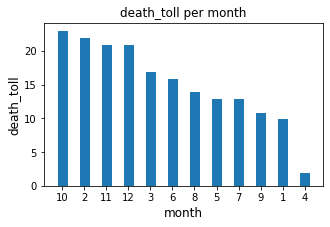

year 102


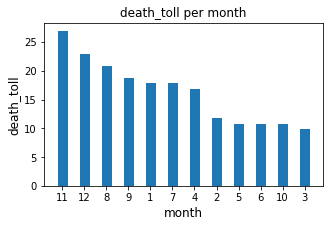

year 103


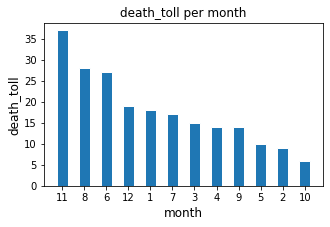

year 104


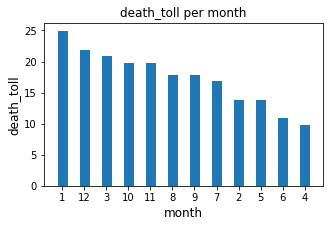

year 105


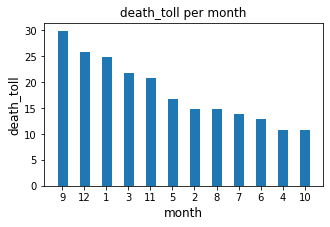

year 106


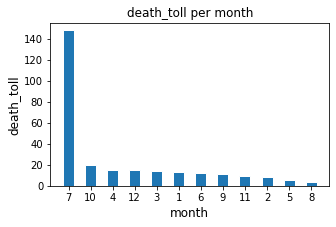

year 107


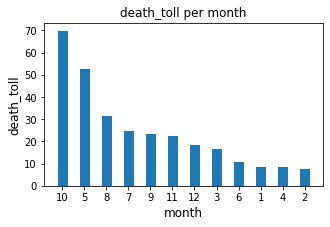

year 108


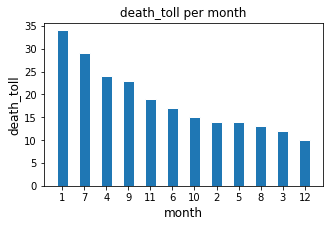

year 101


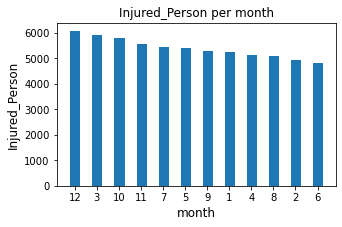

year 102


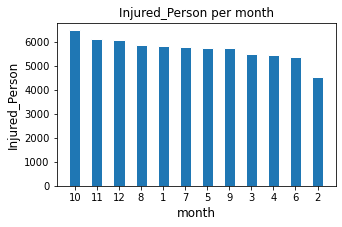

year 103


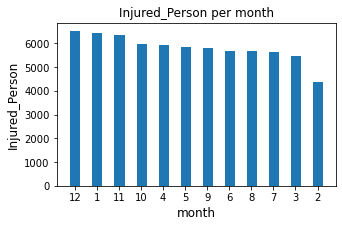

year 104


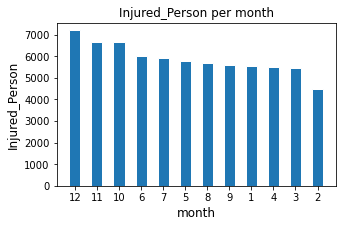

year 105


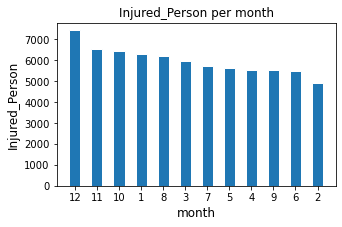

year 106


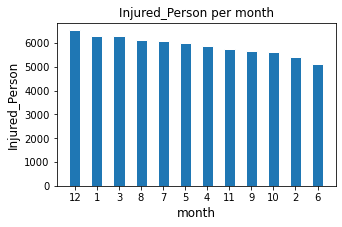

year 107


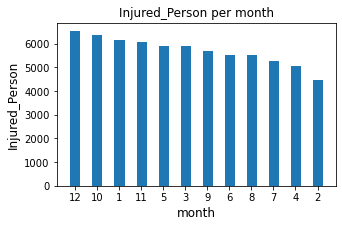

year 108


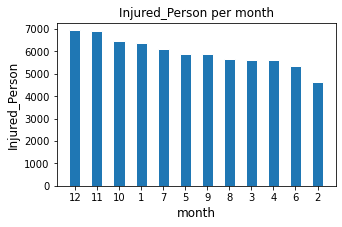

year 101


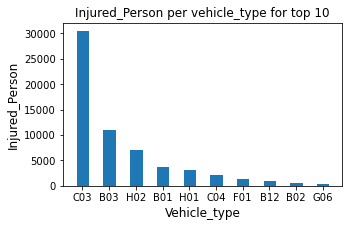

year 102


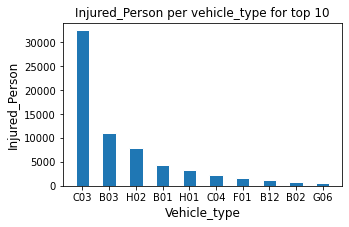

year 103


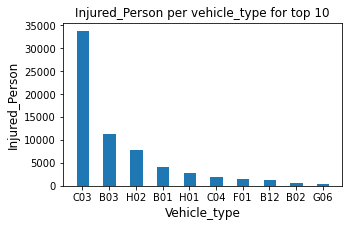

year 104


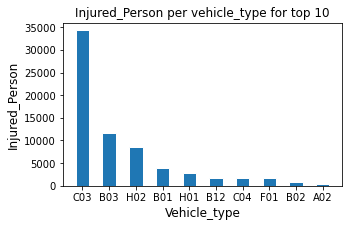

year 105


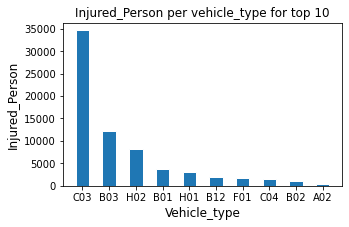

year 106


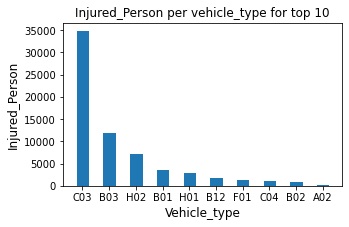

year 107


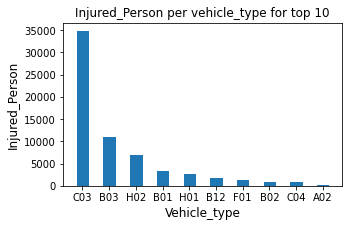

year 108


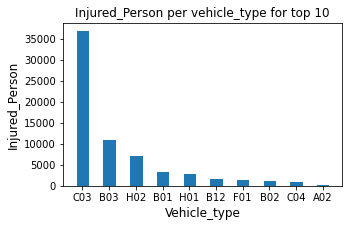

year 101


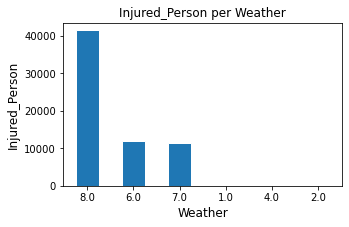

year 102


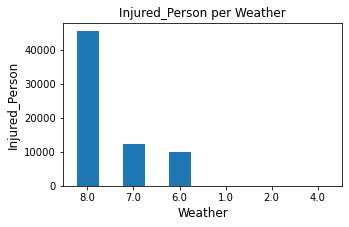

year 103


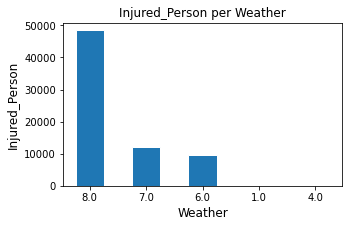

year 104


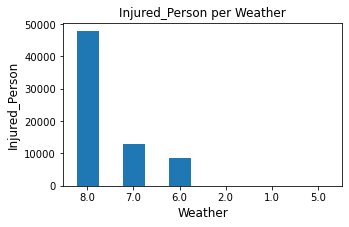

year 105


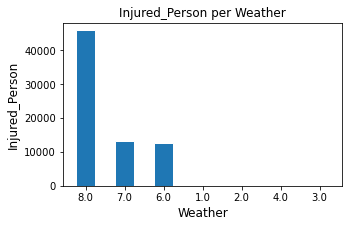

year 106


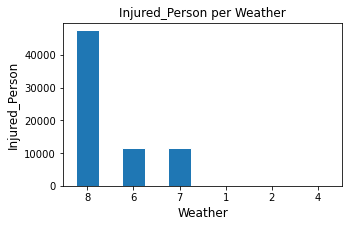

year 107


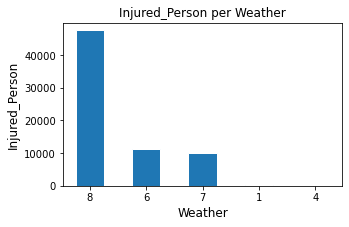

year 108


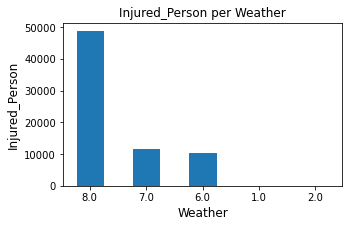

year 101


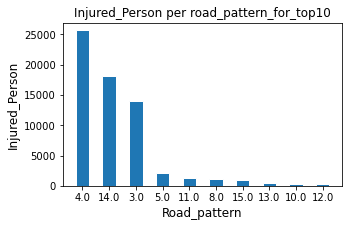

year 102


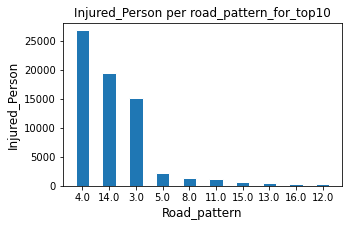

year 103


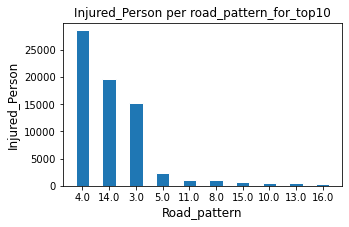

year 104


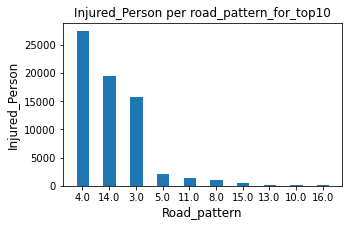

year 105


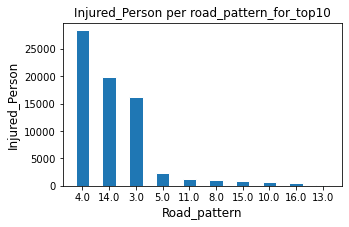

year 106


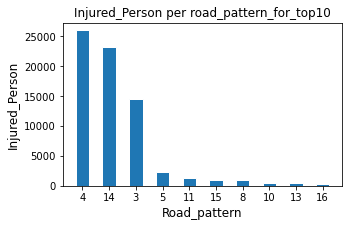

year 107


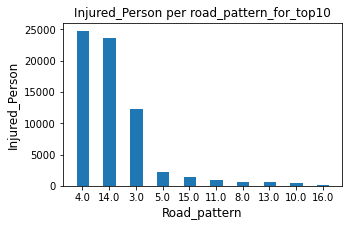

year 108


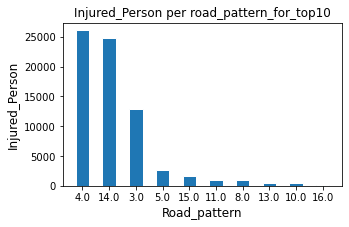

year 101


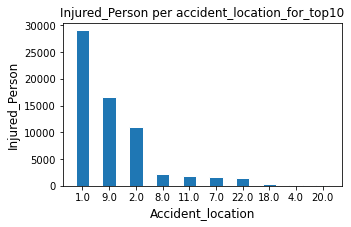

year 102


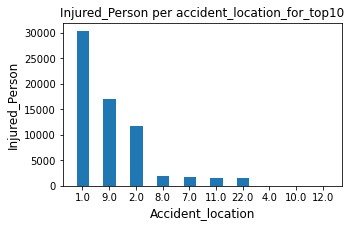

year 103


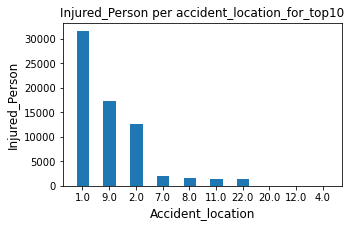

year 104


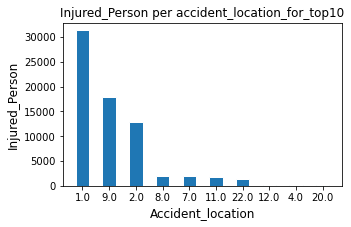

year 105


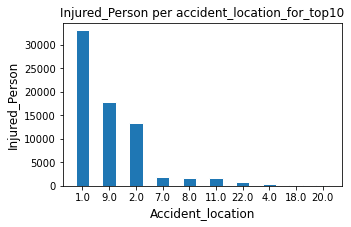

year 106


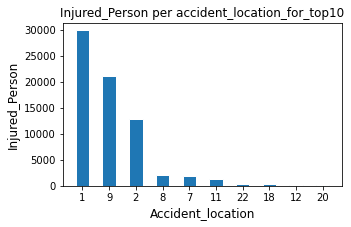

year 107


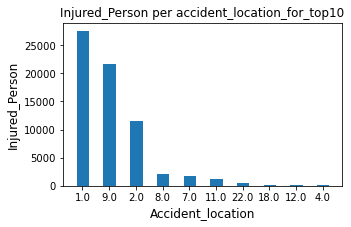

year 108


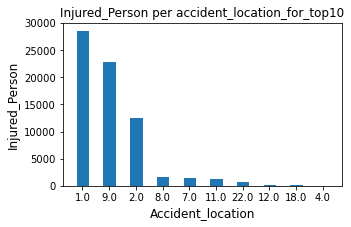

In [9]:
    print("year 101")
    death_toll(traffic_data_all_years[0],"101")
    print("year 102")
    death_toll(traffic_data_all_years[1],"102")
    print("year 103")
    death_toll(traffic_data_all_years[2],"103")
    print("year 104")
    death_toll(traffic_data_all_years[3],"104")
    print("year 105")
    death_toll(traffic_data_all_years[4],"105")
    print("year 106")
    death_toll(traffic_data_all_years[5],"106")
    print("year 107")
    death_toll(traffic_data_all_years[6],"107")
    print("year 108")
    death_toll(traffic_data_all_years[7],"108")
    print("year 101")
    Injured_Person(traffic_data_all_years[0],"101")
    print("year 102")
    Injured_Person(traffic_data_all_years[1],"102")
    print("year 103")
    Injured_Person(traffic_data_all_years[2],"103")
    print("year 104")
    Injured_Person(traffic_data_all_years[3],"104")
    print("year 105")
    Injured_Person(traffic_data_all_years[4],"105")
    print("year 106")
    Injured_Person(traffic_data_all_years[5],"106")
    print("year 107")
    Injured_Person(traffic_data_all_years[6],"107")
    print("year 108")
    Injured_Person(traffic_data_all_years[7],"108")
    print("year 101")
    Vehicle_type(traffic_data_all_years[0],"101")
    print("year 102")
    Vehicle_type(traffic_data_all_years[1],"102")
    print("year 103")
    Vehicle_type(traffic_data_all_years[2],"103")
    print("year 104")
    Vehicle_type(traffic_data_all_years[3],"104")
    print("year 105")
    Vehicle_type(traffic_data_all_years[4],"105")
    print("year 106")
    Vehicle_type(traffic_data_all_years[5],"106")
    print("year 107")
    Vehicle_type(traffic_data_all_years[6],"107")
    print("year 108")
    Vehicle_type(traffic_data_all_years[7],"108")
    print("year 101")
    Weather(traffic_data_all_years[0],"101")
    print("year 102")
    Weather(traffic_data_all_years[1],"102")
    print("year 103")
    Weather(traffic_data_all_years[2],"103")
    print("year 104")
    Weather(traffic_data_all_years[3],"104")
    print("year 105")
    Weather(traffic_data_all_years[4],"105")
    print("year 106")
    Weather(traffic_data_all_years[5],"106")
    print("year 107")
    Weather(traffic_data_all_years[6],"107")
    print("year 108")
    Weather(traffic_data_all_years[7],"108")
    print("year 101")
    Road_pattern(traffic_data_all_years[0],"101")
    print("year 102")
    Road_pattern(traffic_data_all_years[1],"102")
    print("year 103")
    Road_pattern(traffic_data_all_years[2],"103")
    print("year 104")
    Road_pattern(traffic_data_all_years[3],"104")
    print("year 105")
    Road_pattern(traffic_data_all_years[4],"105")
    print("year 106")
    Road_pattern(traffic_data_all_years[5],"106")
    print("year 107")
    Road_pattern(traffic_data_all_years[6],"107")
    print("year 108")
    Road_pattern(traffic_data_all_years[7],"108")
    print("year 101")
    Accident_location(traffic_data_all_years[0],"101")
    print("year 102")
    Accident_location(traffic_data_all_years[1],"102")
    print("year 103")
    Accident_location(traffic_data_all_years[2],"103")
    print("year 104")
    Accident_location(traffic_data_all_years[3],"104")
    print("year 105")
    Accident_location(traffic_data_all_years[4],"105")
    print("year 106")
    Accident_location(traffic_data_all_years[5],"106")
    print("year 107")
    Accident_location(traffic_data_all_years[6],"107")
    print("year 108")
    Accident_location(traffic_data_all_years[7],"108")



In [10]:
def for_each_year_grid(data,label):
    ysize=10
    xsize=20
    fontsize=12
    fontweight='blod'
    plt.subplots_adjust(wspace =1, hspace =0.5)
    plt.figure(figsize=(xsize, ysize))
    
    
    
    plt.subplot(231)
    month=["1","2","3","4","5","6","7","8","9","10","11","12"]
    width=0.5
    temp={}

    data_for_month = data.groupby("Month")
    index = np.arange(len(month))
    
    for m in month:
        count=0
        number=len(data_for_month.get_group((int(m))))
        data_for_dt=data_for_month.get_group(int(m)).head(number)
        for death_num in data_for_dt['death_toll']:
            count=count+death_num
        temp[m]=count
    temp=sorted(temp.items(), key=lambda kv: kv[1],reverse = True)
    xdata=[]
    ydata=[]
    for data1 in temp:
        xdata.append(data1[0])
        ydata.append(data1[1])

    plt.bar(index, ydata, width=width, edgecolor='white',label=label)
    plt.xlabel('month',fontsize=fontsize)
    plt.ylabel('death_toll',fontsize=fontsize)
    plt.xticks([r for r in range(len(xdata))], xdata)
    plt.title("death_toll per month")
    
    
    
    plt.subplot(232)
    temp={}
    data_for_month = data.groupby("Month")
    index = np.arange(len(month))
    for m in month:
        count=0
        number=len(data_for_month.get_group((int(m))))
        data_fr=data_for_month.get_group(int(m)).head(number)
        for Injuries_num in data_fr['Injuries_Person']:
            count=count+Injuries_num
        temp[m]=count
    
    temp=sorted(temp.items(), key=lambda kv: kv[1],reverse = True)
    xdata=[]
    ydata=[]
    for data1 in temp:
        xdata.append(data1[0])
        ydata.append(data1[1])

    
    plt.bar(index, ydata, width=width, edgecolor='white',label=label)
    plt.xlabel('month',fontsize=fontsize)
    plt.ylabel('Injured_Person',fontsize=fontsize)
    plt.xticks([r for r in range(len(xdata))], xdata)
    plt.title("Injured_Person per month")
    
    
    
    plt.subplot(233)
    temp=[]
    data_for_vehicletype = data.groupby("Vehicle_type")
    dataT=data_for_vehicletype.size().to_frame().reset_index()
    vehicle_list=dataT["Vehicle_type"].to_list()
    xdata=[]
    ydata=[]
    dic={}
    count=0
    for v_type in vehicle_list:
        count=0
        dataT=data_for_vehicletype.get_group(v_type)
        for row in dataT["Injuries_Person"]:
            count += row
        dic[v_type]=count
    temp=sorted(dic.items(), key=lambda kv: kv[1],reverse = True)
    xdata=[]
    ydata=[]
    i=0
    for data1 in temp:
        xdata.append(data1[0])
        ydata.append(data1[1])
        i+=1
        if i==10:
            break

    index = np.arange(len(xdata))
    plt.bar(index, ydata, width=width, edgecolor='white',label=label)
    plt.xlabel('Vehicle_type',fontsize=fontsize)
    plt.ylabel('Injured_Person',fontsize=fontsize)
    plt.xticks([r for r in range(len(xdata))], xdata)
    plt.title("Injured_Person per vehicle_type_top10")
    # Display TOP 10 Vehicle_type
    
    
    plt.subplot(234)
    temp=[]
    data_for_weather = data.groupby("Weather")
    dataT=data_for_weather.size().to_frame().reset_index()
    weather_list=dataT["Weather"].to_list()
    xdata=[]
    ydata=[]
    dic={}
    count=0
    for w_type in weather_list:
        count=0
        dataT=data_for_weather.get_group(w_type)
        for row in dataT["Injuries_Person"]:
            count += row
        dic[w_type]=count
    temp=sorted(dic.items(), key=lambda kv: kv[1],reverse = True)
    xdata=[]
    ydata=[]
    for data1 in temp:
        xdata.append(data1[0])
        ydata.append(data1[1])
    index = np.arange(len(xdata))
    plt.bar(index, ydata, width=width, edgecolor='white',label=label)
    plt.xlabel('Weather',fontsize=fontsize)
    plt.ylabel('Injured_Person',fontsize=fontsize)
    plt.xticks([r for r in range(len(xdata))], xdata)
    plt.title("Injured_Person per Weather")
    
    
    
    plt.subplot(235)
    temp=[]
    data_for_roadpattern = data.groupby("Road_pattern")
    dataT=data_for_roadpattern.size().to_frame().reset_index()
    key_list=dataT["Road_pattern"].to_list()
    xdata=[]
    ydata=[]
    dic={}
    count=0
    for v_type in key_list:
        count=0
        dataT=data_for_roadpattern.get_group(v_type)
        for row in dataT["Injuries_Person"]:
            count += row
        dic[v_type]=count
    temp=sorted(dic.items(), key=lambda kv: kv[1],reverse = True)
    xdata=[]
    ydata=[]
    i=0
    for data1 in temp:
        xdata.append(data1[0])
        ydata.append(data1[1])
        i+=1
        if i==10:                      #for displaying only 10 values
            break

    index = np.arange(len(xdata))
    plt.bar(index, ydata, width=width, edgecolor='white',label=label)
    plt.xlabel('Road_pattern',fontsize=fontsize)
    plt.ylabel('Injured_Person',fontsize=fontsize)
    plt.xticks([r for r in range(len(xdata))], xdata)
    plt.title("Injured_Person per road_pattern_for_top10")
    #Display TOP 10 Road_pattern
    
    
    
    plt.subplot(236)
    temp=[]
    data_for_accidentlocation = data.groupby("Accident_location")
    dataT=data_for_accidentlocation.size().to_frame().reset_index()
    key_list=dataT["Accident_location"].to_list()
    dic={}
    count=0
    for v_type in key_list:
        count=0
        dataT=data_for_accidentlocation.get_group(v_type)
        for row in dataT["Injuries_Person"]:
            count += row
        dic[v_type]=count
    temp=sorted(dic.items(), key=lambda kv: kv[1],reverse = True)
    xdata=[]
    ydata=[]
    i=0
    for data1 in temp:
        xdata.append(data1[0])
        ydata.append(data1[1])
        i+=1
        if i==10:                     #for displaying only 10 values
            break

    index = np.arange(len(xdata))
    plt.bar(index, ydata, width=width, edgecolor='white',label=label)
    plt.xlabel('Accident_location',fontsize=fontsize)
    plt.ylabel('Injured_Person',fontsize=fontsize)
    plt.xticks([r for r in range(len(xdata))], xdata)
    plt.title("Injured_Person per accident_location_top10")
    # Display TOP 10 Accident_location
    
    
    plt.show()
    
  
    

Grid for 101 for six topics


<Figure size 432x288 with 0 Axes>

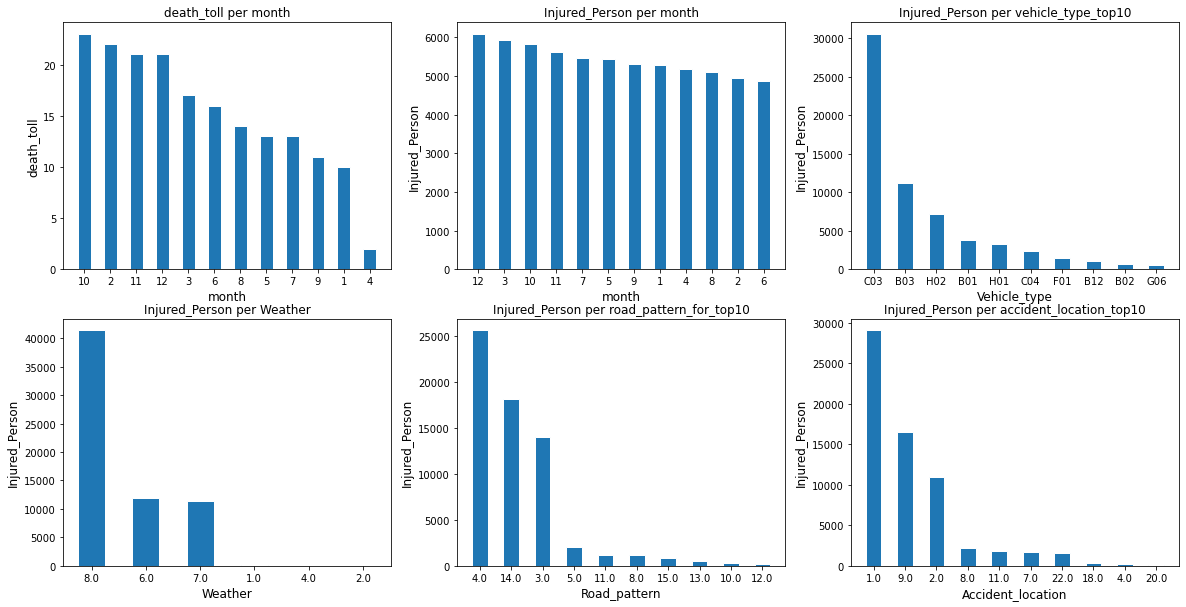

Grid for 102 for six topics


<Figure size 432x288 with 0 Axes>

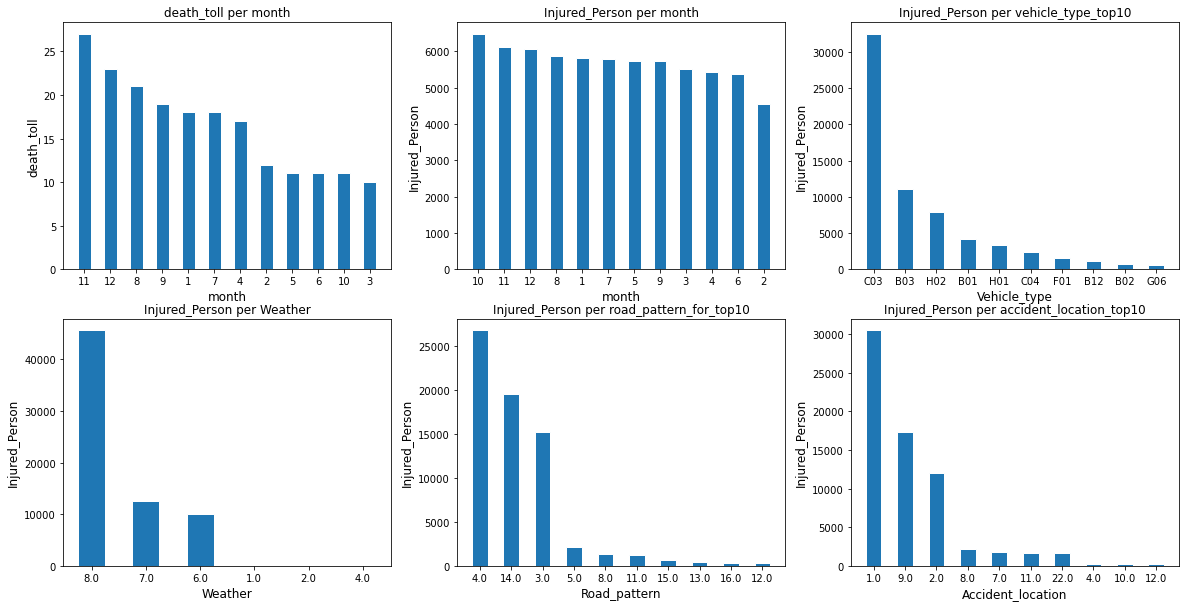

Grid for 103 for six topics


<Figure size 432x288 with 0 Axes>

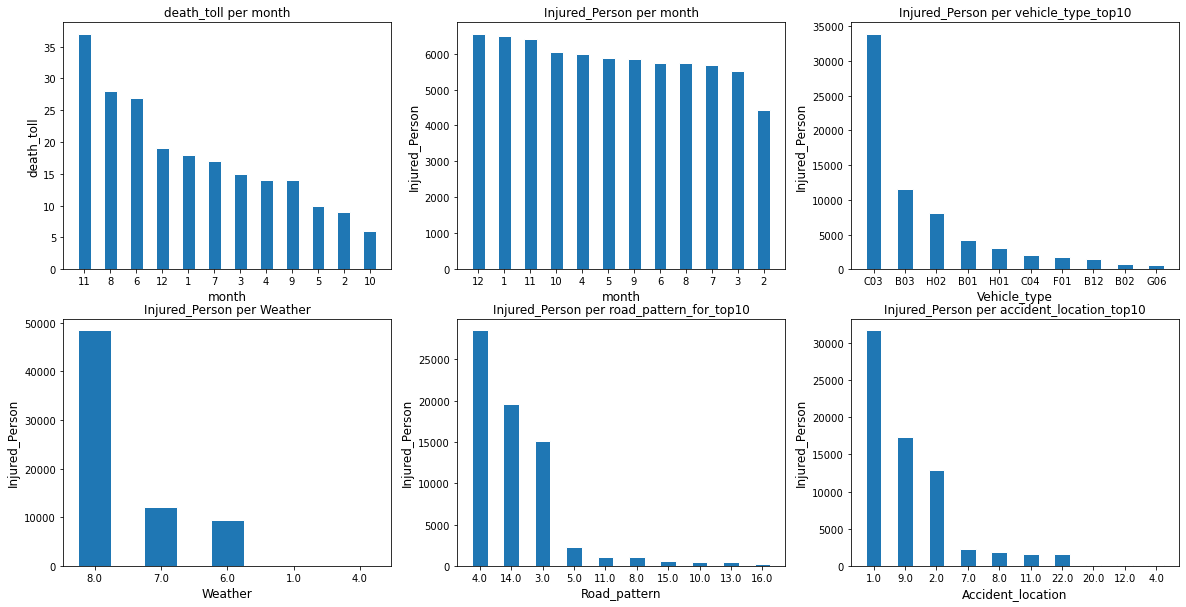

Grid for 104 for six topics


<Figure size 432x288 with 0 Axes>

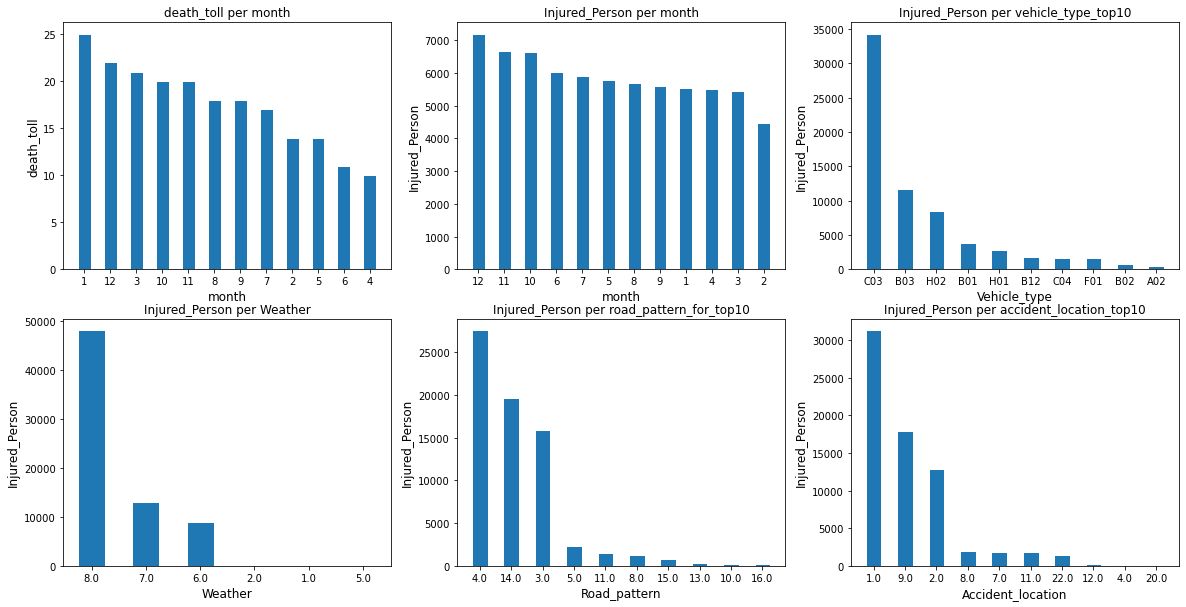

Grid for 105 for six topics


<Figure size 432x288 with 0 Axes>

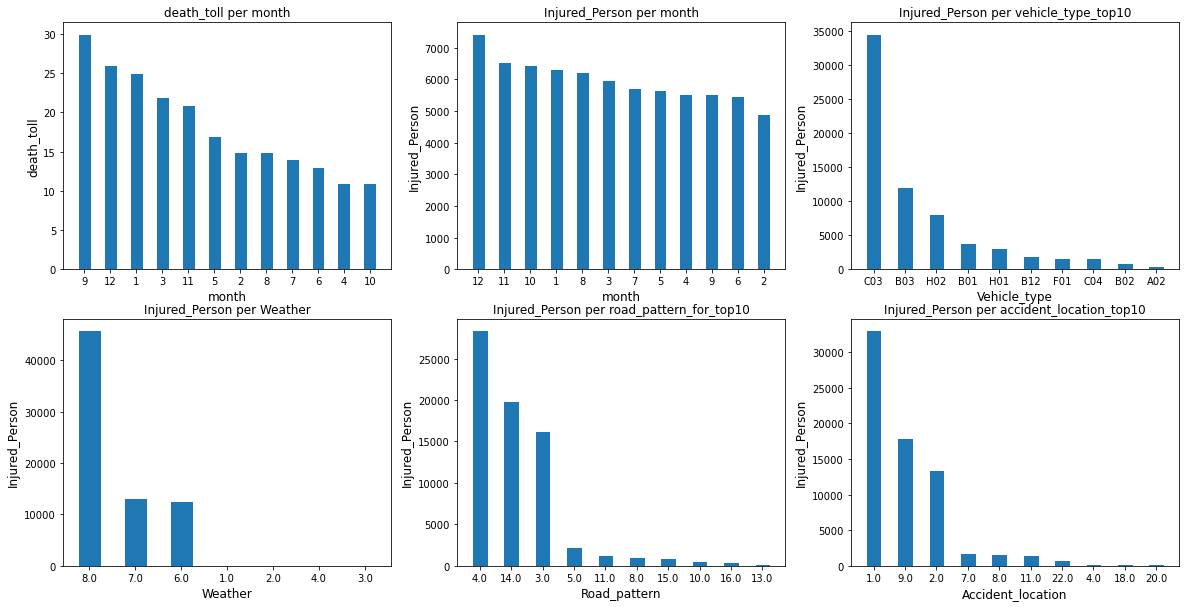

Grid for 106 for six topics


<Figure size 432x288 with 0 Axes>

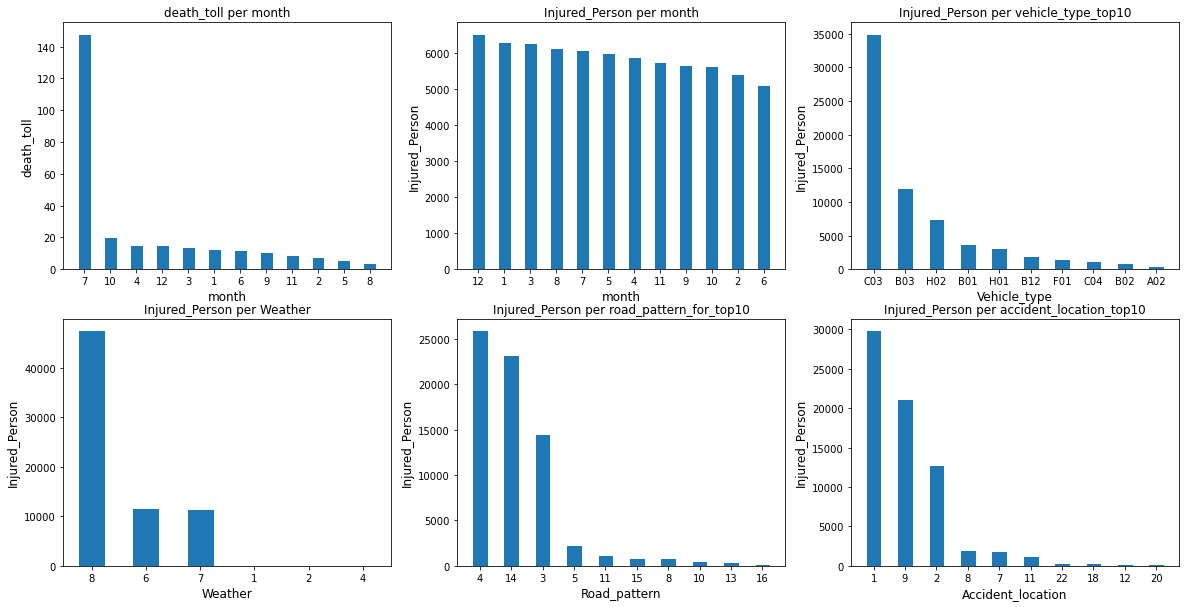

Grid for 107 for six topics


<Figure size 432x288 with 0 Axes>

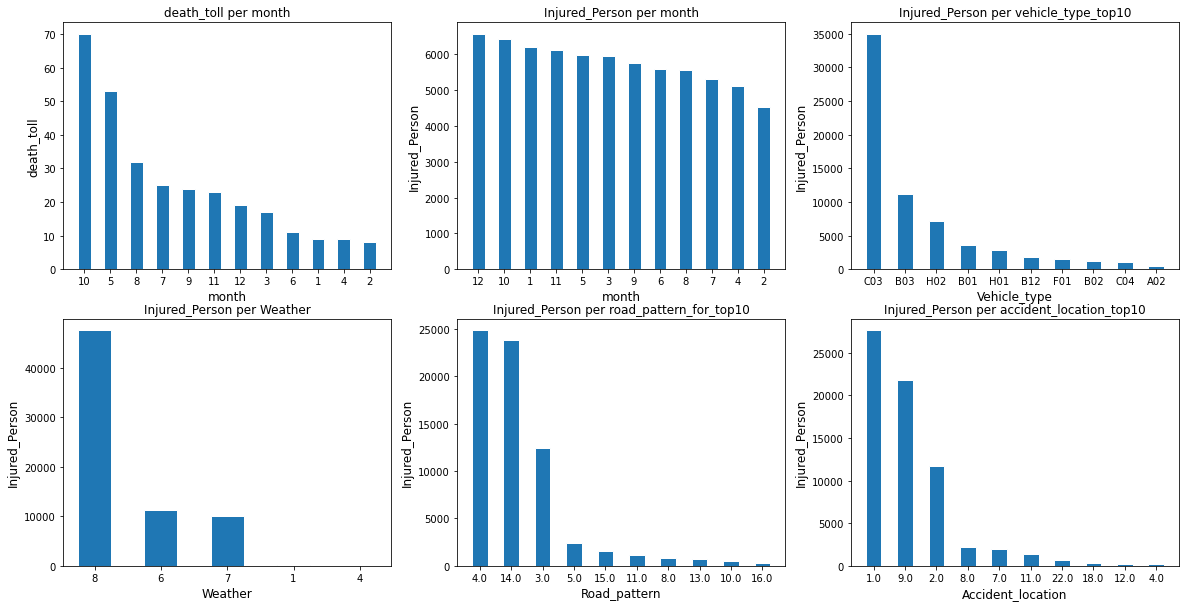

Grid for 108 for six topics


<Figure size 432x288 with 0 Axes>

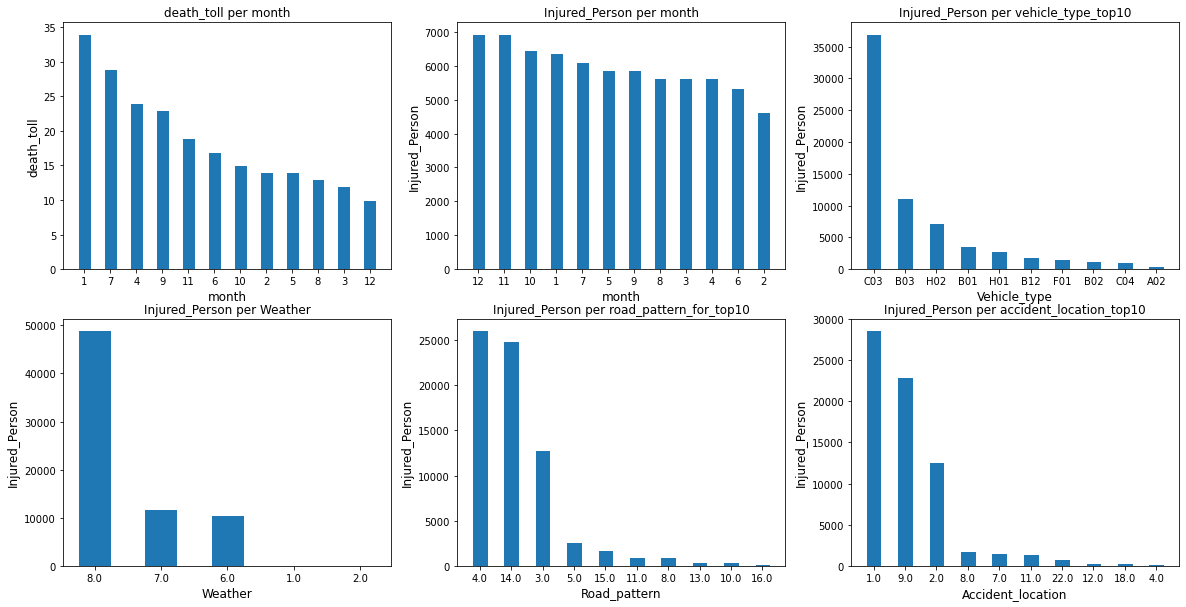

In [11]:
    print("Grid for 101 for six topics")
    for_each_year_grid(traffic_data_all_years[0],"101")
    print("Grid for 102 for six topics")
    for_each_year_grid(traffic_data_all_years[1],"102")
    print("Grid for 103 for six topics")
    for_each_year_grid(traffic_data_all_years[2],"103")
    print("Grid for 104 for six topics")
    for_each_year_grid(traffic_data_all_years[3],"104")
    print("Grid for 105 for six topics")
    for_each_year_grid(traffic_data_all_years[4],"105")
    print("Grid for 106 for six topics")
    for_each_year_grid(traffic_data_all_years[5],"106")
    print("Grid for 107 for six topics")
    for_each_year_grid(traffic_data_all_years[6],"107")
    print("Grid for 108 for six topics")
    for_each_year_grid(traffic_data_all_years[7],"108")